# Data Rangling project

## Step 1: Importing tools and libraries

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json


## Step 2: Gathering data

1- get all the files ready for work

In [2]:
#save the image_prediction.tsv file
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(image_prediction.content)
    
url_2 ='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
f = requests.get(url_2)
with open(url_2.split('/')[-1], mode='wb') as file:
    file.write(f.content)

    
# I also uploaded the twitter-archive-enhanced.csv file

2- covert the files to pandas dataframes

In [3]:
df_original = pd.read_csv('twitter-archive-enhanced.csv')

df_image_original = pd.read_csv('image-predictions.tsv', sep = '\t')

#with open('tweet-json.txt') as json_file:
#    data = json.load(json_file)
    
tweets = []
df_list = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
for i in tweets:
    favorite_count = i['favorite_count']
    i_d = i['id']
    retweet_count =i['retweet_count']
    
    
    df_list.append({'tweet_id': i_d, 'favorite_count': favorite_count, 'retweet_count': retweet_count})    


df_third_oringinal = pd.DataFrame(df_list) 



### Copying the data frames:
    

In [4]:
df = df_original.copy()
df_image = df_image_original.copy()
df_third = df_third_oringinal.copy()

## Step 3: Assessing data

Find at least eight (8) quality issues and two (2) tidiness issues.

### Assess df dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Quality problems found:
- Many names are missing and represented as'None', the same issue is present in other columns as well, hence, None values should be converted to NaN (Done)
- Rating_denominator (always 10): redundant column (unnecessary) (Done)
- Some columns have informations that are not valuable for us like:
retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp / in_reply_to_status_id / in_reply_to_user_id (Done)
- some invalid names like 'an', 'one', 'not', 'this', 'a','space', 'The' and 'light. (Done)
- Time stamp should be converted to datatime. (Done)
- tweet_id should be string type (Done)
- rating_numerator below 10 are invalid.
- outliers in the rating_numerator column.

Tidiness problems found:
- This table should be joined with df_third table Keeping only the Tweets that have images in the image dataframe (Done).
- doggo, floofer, pupper, puppo columns can be combined into one column (Done).
- Duplicate column: expanded_urls can be extracted from tweet_id easily (Done)
- text column contains urls which should be extracted (Done).


### Assessing image dataframe

In [6]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality Issues:
- tweet_id column shoud be string value.(Done)


Tideness Issues:
- Not found

### Assessing df_third dataframe

In [7]:
df_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Quality problems:
- favorite_count, retweet_count should be integer type values (Done)
- tweet_id column shoud be string value (Done)

Tideness Problems:
- This table should be joined with df table Keeping only the Tweets that have images in the image dataframe (Done).



## Step 4: Cleaning data

#### Define (Missing Values Issue)
- Null values are expressed as 'None'

#### Code:


In [8]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)

#### Test:


In [9]:
df.info()
df.name.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Toby          7
Bailey        7
Daisy         7
Jax           6
Oscar         6
Milo          6
Rusty         6
Koda          6
Bella         6
Dave          6
Leo           6
Jack          6
Scout         6
Stanley       6
Chester       5
Bentley       5
             ..
Philippe      1
Sailor        1
Zooey         1
Mosby         1
Tebow         1
Ebby          1
Hubertson     1
Tobi          1
Thor          1
Tupawc        1
Dixie         1
Carter        1
Bruno         1
Chloe         1
Rudy          1
Rover         1
Poppy         1
Maisey        1
Stella        1
Alexander     1
Filup         1
Gunner        1
Swagger       1
Scruffers     1
Harlso        1
Rueben        1
Kingsley      1
Marvin        1
Benny         1
Travis        1
Name: name, Length: 956,

#### Define (First Tidiness issue):
- df table should be joined with df table Keeping only the Tweets that have images in the image dataframe.

#### Code:


In [10]:
#merging df and df_third into one table
merged =  pd.merge(df, df_third, on='tweet_id', how='left' )

# Keeping only the Tweets that have images in the image dataframe
tweet_ids = list(df_image.tweet_id)
merged = merged.where(merged.tweet_id.isin(tweet_ids) == True)
merged = merged[merged['tweet_id'].notna()].reset_index()

#### Test:

In [11]:
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 20 columns):
index                         2075 non-null int64
tweet_id                      2075 non-null float64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          1497 non-null object
doggo                         80 non-null object
floofer                       8 non-null object
pupper                        222 non-null object
puppo                         24 non

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,39467.0,8853.0
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,33819.0,6514.0
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,25461.0,4328.0
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,42908.0,8964.0
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,41048.0,9774.0


### Define (second tidiness issue):
- doggo, floofer, pupper, puppo columns can be combined into one column.

### Code:


In [12]:
# handle none
merged.doggo.replace(np.nan, '', inplace=True)
merged.floofer.replace(np.nan, '', inplace=True)
merged.pupper.replace(np.nan, '', inplace=True)
merged.puppo.replace(np.nan, '', inplace=True)

merged['stage'] = merged.doggo + merged.floofer + merged.pupper + merged.puppo

# handle multiple stages
merged.loc[merged.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
merged.loc[merged.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
merged.loc[merged.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# handle missing values
merged.loc[merged.stage == '', 'stage'] = np.nan


#test
merged.head(10)



,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,stage
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,13.0,10.0,Phineas,,,,,39467.0,8853.0,NaN
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,13.0,10.0,Tilly,,,,,33819.0,6514.0,NaN
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,12.0,10.0,Archie,,,,,25461.0,4328.0,NaN
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,13.0,10.0,Darla,,,,,42908.0,8964.0,NaN
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,12.0,10.0,Franklin,,,,,41048.0,9774.0,NaN
5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,13.0,10.0,NaN,,,,,20562.0,3261.0,NaN
6,6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,...,13.0,10.0,Jax,,,,,12041.0,2158.0,NaN
7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,...,13.0,10.0,NaN,,,,,56848.0,16716.0,NaN
8,8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,...,13.0,10.0,Zoey,,,,,28226.0,4429.0,NaN
9,9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,14.0,10.0,Cassie,doggo,,,,32467.0,7711.0,doggo


#### Define (Third tidiness problem):
- Duplicate column: expanded_urls can be extracted from tweet_id easily.
- text column contains ratings and url which should be removed.

#### Code:


In [13]:
merged.drop(columns=['expanded_urls'], inplace = True)


In [14]:
text = merged['text'].str.split("http", n= 2, expand = True)[0]
url_1 = 'http' + merged['text'].str.split("http", n= 2, expand = True)[1]
url_2 = 'http' + merged['text'].str.split("http", n= 2, expand = True)[2]
merged['text'] = text
merged['photo_url_1'] =url_1
merged['photo_url_2'] =url_2

In [15]:
#test
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 22 columns):
index                         2075 non-null int64
tweet_id                      2075 non-null float64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          1497 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
favorite_count                

#### Define:

- Rating_denominator (always 10): redundant column (unnecessary) (Done)
- Some columns have informations that are not valuable for us like:
retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp / in_reply_to_status_id / in_reply_to_user_id (Done)


#### Code:

In [16]:
merged.drop(columns=['rating_denominator', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 16 columns):
index               2075 non-null int64
tweet_id            2075 non-null float64
timestamp           2075 non-null object
source              2075 non-null object
text                2075 non-null object
rating_numerator    2075 non-null float64
name                1497 non-null object
doggo               2075 non-null object
floofer             2075 non-null object
pupper              2075 non-null object
puppo               2075 non-null object
favorite_count      2073 non-null float64
retweet_count       2073 non-null float64
stage               321 non-null object
photo_url_1         2075 non-null object
photo_url_2         29 non-null object
dtypes: float64(4), int64(1), object(11)
memory usage: 259.5+ KB


#### Define:
- some invalid names like 'an', 'one', 'not', 'this', 'a','space', 'The' and 'light.

#### Code :

In [18]:
merged.name.replace(np.nan, '', inplace=True)
lower_dog_name_index = merged[merged.name.str.islower()].index

merged.drop(lower_dog_name_index, inplace=True)
merged.loc[merged.name == '', 'name'] = np.nan

merged.shape

(1975, 16)

#### Test

In [19]:
merged.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Penny        10
Oliver       10
Tucker       10
Winston       8
Lola          8
Bo            8
Sadie         8
Daisy         7
Toby          7
Koda          6
Dave          6
Rusty         6
Milo          6
Stanley       6
Bella         6
Jax           6
Scout         6
Bailey        6
Chester       5
Alfie         5
Louis         5
Oscar         5
Larry         5
Leo           5
Buddy         5
Finn          4
Walter        4
             ..
Thor          1
Blakely       1
Chef          1
Napolean      1
Corey         1
Berkeley      1
Pupcasso      1
Toffee        1
Swagger       1
Filup         1
Mack          1
Severus       1
Schnozz       1
Bobbay        1
Grady         1
Wiggles       1
Blitz         1
Travis        1
Cheesy        1
Akumi         1
Harnold       1
Fabio         1
Mike          1
Jebberson     1
Bruno         1
Fizz          1
Suki          1
Maisey        1
Gordon        1
Baron         1
Name: name, Length: 913,

#### Define (Invalid Types):
- Time stamp should be converted to datatime (merged dataframe)
- tweet_id should be string type (merged and image dataframes)
- Filling missing values in favorite_count, retweet_count wit zeros
- favorite_count, retweet_count should be integer type values (merged daraframe).

#### Code:


In [20]:
merged['timestamp'] = pd.to_datetime(merged['timestamp'])
merged['tweet_id'] = str(merged['tweet_id'])
df_image['tweet_id'] = str(df_image['tweet_id'])
merged['favorite_count'] = merged['favorite_count'].fillna(0.0).astype(int)
merged['retweet_count'] = merged['retweet_count'].fillna(0.0).astype(int)


In [21]:
#test
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2074
Data columns (total 16 columns):
index               1975 non-null int64
tweet_id            1975 non-null object
timestamp           1975 non-null datetime64[ns]
source              1975 non-null object
text                1975 non-null object
rating_numerator    1975 non-null float64
name                1397 non-null object
doggo               1975 non-null object
floofer             1975 non-null object
pupper              1975 non-null object
puppo               1975 non-null object
favorite_count      1975 non-null int64
retweet_count       1975 non-null int64
stage               308 non-null object
photo_url_1         1975 non-null object
photo_url_2         29 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(11)
memory usage: 262.3+ KB


In [22]:
#test
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define:
- photo_url_1 and photo_url_2 should be removed as they exist in the image dataframe (Duplicate data)
- exteact rating_numerator from text and remove rating_numerator below 10 because they are invalid
#### Code:



In [23]:
rating = merged.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']


In [24]:
merged.drop(columns=['photo_url_1', 'photo_url_2'], inplace = True)

In [25]:
merged['rating_numerator'] = rating['rating_numerator'].astype(float)

In [26]:
merged = merged[merged['rating_numerator'] >= 10]

In [27]:
# Test
merged.rating_numerator.value_counts()

12.00      460
10.00      406
11.00      397
13.00      280
14.00       36
80.00        1
13.50        1
15.00        1
84.00        1
24.00        1
50.00        1
143.00       1
420.00       1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
45.00        1
Name: rating_numerator, dtype: int64

In [28]:
##Save the databases
merged.to_csv('twitter_archive_master.csv')
df_image.to_csv('image-predictions_master.csv')

## Analysis of the data:

In [29]:
merged.info()
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 2062
Data columns (total 14 columns):
index               1597 non-null int64
tweet_id            1597 non-null object
timestamp           1597 non-null datetime64[ns]
source              1597 non-null object
text                1597 non-null object
rating_numerator    1597 non-null float64
name                1145 non-null object
doggo               1597 non-null object
floofer             1597 non-null object
pupper              1597 non-null object
puppo               1597 non-null object
favorite_count      1597 non-null int64
retweet_count       1597 non-null int64
stage               265 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 187.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null 

Analysis of average rating for different stages:


{'doggo': 12.111111111111111, 'puppo': 12.173913043478262, 'pupper': 11.315523255813954, 'floofer': 11.875}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  app.launch_new_instance()


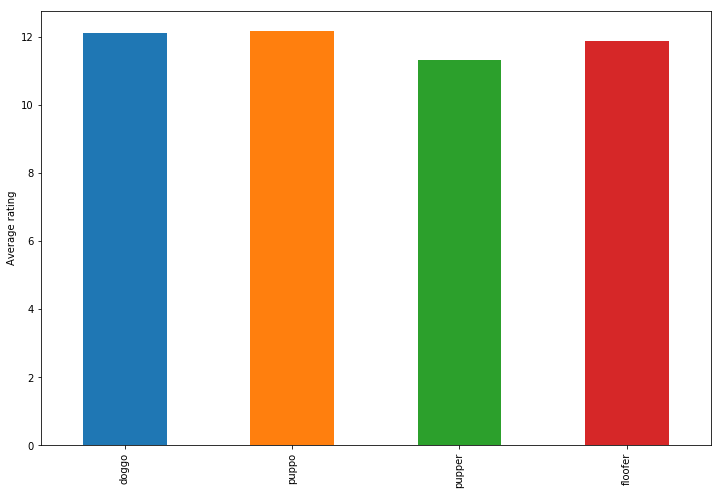

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 2062
Data columns (total 14 columns):
index               1597 non-null int64
tweet_id            1597 non-null object
timestamp           1597 non-null datetime64[ns]
source              1597 non-null object
text                1597 non-null object
rating_numerator    1597 non-null float64
name                1145 non-null object
doggo               1597 non-null object
floofer             1597 non-null object
pupper              1597 non-null object
puppo               1597 non-null object
favorite_count      1597 non-null int64
retweet_count       1597 non-null int64
stage               265 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 187.1+ KB


In [36]:
## A function that gets that averge rating for each stage.
def average_rating(df):
    av_rating= {}
    stages = ['doggo', 'puppo', 'pupper', 'floofer']
    df.stage.replace(np.nan, '', inplace=True)
    for i in stages:
        rating = df[df['stage'].str.contains(i)].rating_numerator.mean()
        av_rating[i] = rating
    df.stage.replace('', np.nan, inplace=True)
    return av_rating

rattings_per_stage = average_rating(merged)
print(rattings_per_stage)

##plotting
freq_series = pd.Series.from_array(rattings_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Average rating')
plt.show()


In [ ]:
columns = ['rating_numerator', 'favorite_count', 'retweet_count']
scatter = pd.scatter_matrix(merged[columns], marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))

In [ ]:
merged.describe()

{'doggo': 18599.041666666668, 'puppo': 22581.434782608696, 'pupper': 7819.5348837209303, 'floofer': 13701.375}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.


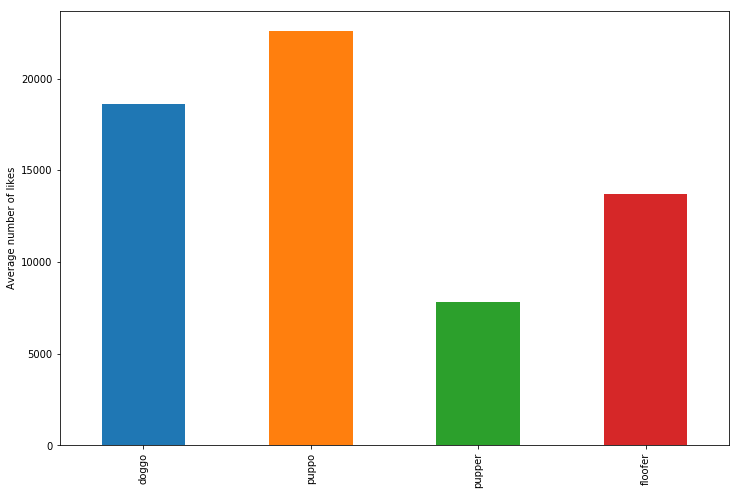

In [37]:
def average_likes(df):
    av_rating= {}
    stages = ['doggo', 'puppo', 'pupper', 'floofer']
    df.stage.replace(np.nan, '', inplace=True)
    for i in stages:
        rating = df[df['stage'].str.contains(i)].favorite_count.mean()

        av_rating[i] = rating
    df.stage.replace('', np.nan, inplace=True)
    return av_rating


likes_per_stage = average_likes(merged)
print(likes_per_stage)

##plotting
freq_series_2 = pd.Series.from_array(likes_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series_2.plot(kind='bar')
fig.set_ylabel('Average number of likes')
plt.show()


{'doggo': 8161.5555555555557, 'puppo': 7234.913043478261, 'pupper': 2865.8372093023254, 'floofer': 4776.75}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.


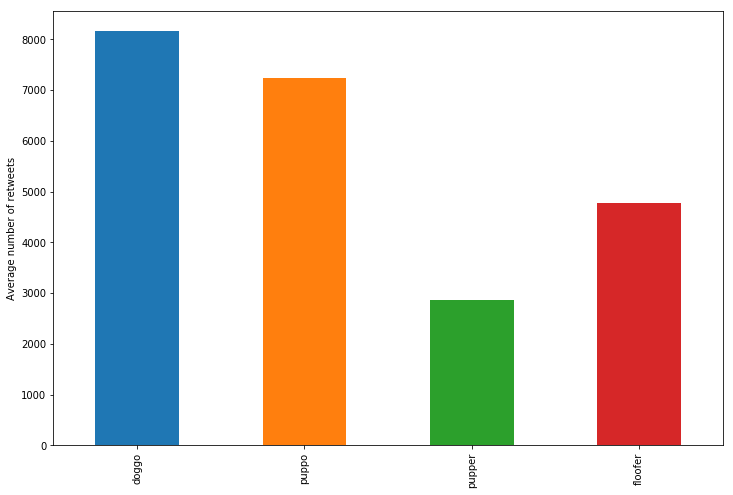

In [38]:
def average_retweets(df):
    av_rating= {}
    stages = ['doggo', 'puppo', 'pupper', 'floofer']
    df.stage.replace(np.nan, '', inplace=True)
    for i in stages:
        rating = df[df['stage'].str.contains(i)].retweet_count.mean()

        av_rating[i] = rating
    df.stage.replace('', np.nan, inplace=True)
    return av_rating




retweets_per_stage = average_retweets(merged)
print(retweets_per_stage)

##plotting
freq_series_3 = pd.Series.from_array(retweets_per_stage)
plt.figure(figsize=(12, 8))
fig = freq_series_3.plot(kind='bar')
fig.set_ylabel('Average number of retweets')
plt.show()


In [ ]:
df_image.info()

In [ ]:
df_image.p1_conf.describe()

In [ ]:
df_image.p1_dog.value_counts()